# Capstone Project 1: EDA

This notebook contains the code for conducting EDA on the dataset for my first capstone project.  The data used here was pulled from Kaggle's API and was wrangled using code contained in a separate notbook.  The code for data wrangling can be found in this folder's parent directory under \Data Wrangling\Capstone Project 1 Data Wrangling.ipynb.  The data used here have been cleaned and are read from a csv file that is stored in this directory.  

In the following EDA, I ask several questions to gain a better understanding of the data and to place it within the context of the business problem contained in the project description.  These questions are stated in bold above the corresponding analyses.

In [2]:
#Import packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
import numpy as np
from scipy import stats as sts
import statsmodels.api as sm
import math

In [3]:
#Begin by reading in data

df = pd.read_csv('C:/Users/robva/Dropbox (Personal)/Springboard Data Science Course/Capstone Project 1/EDA/file_for_analysis_1.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,...,region_Ōsaka-fu Suita-shi Izumichō,region_Ōsaka-fu Ōsaka-shi Fuminosato,region_Ōsaka-fu Ōsaka-shi Kyōmachibori,region_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,region_Ōsaka-fu Ōsaka-shi Nakanochō,region_Ōsaka-fu Ōsaka-shi Nanbasennichimae,region_Ōsaka-fu Ōsaka-shi Shinmachi,region_Ōsaka-fu Ōsaka-shi Ōgimachi,region_Ōsaka-fu Ōsaka-shi Ōhiraki,competition
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,0,0,0,0,0,0,0,0,0,18
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,0,0,0,0,0,0,0,0,0,18
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,0,0,0,0,0,0,0,0,0,18
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,...,0,0,0,0,0,0,0,0,0,19
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,...,0,0,0,0,0,0,0,0,0,19


# How many observations are there?

In [4]:
n = df.air_store_id.count()
print("There are", n, "unique observations.")

There are 296279 unique observations.


# What dates do the dataset cover?

In [5]:
df = df.sort_values(by = 'visit_date', ascending = True)
beginning = df.visit_date.min()
first_day = df.iloc[0,7]
last_day = df.iloc[-1,7]
end = df.visit_date.max()
print("The data include observations for every day between", first_day,",",beginning, "and",last_day,",", end,".")

The data include observations for every day between Friday , 2016-01-01 and Saturday , 2017-04-22 .


# How many restaurants are included in the dataset?

In [6]:
n_restaurant = len(df.groupby('air_store_id'))
print("There are",n_restaurant,"restaurants in the dataset.")

There are 829 restaurants in the dataset.


# How many stores are in each geographic region?


In [7]:
stores_by_region = df.drop_duplicates(['air_area_name','air_store_id'], keep='first')
stores_by_region = stores_by_region.groupby(by='air_area_name').count()
stores_by_region = stores_by_region['air_store_id'].to_frame().sort_values(by = 'air_store_id', ascending=False)
pd.set_option('display.max_rows', 103)
stores_by_region.head(10)

,air_store_id
air_area_name,
Fukuoka-ken Fukuoka-shi Daimyō,64
Tōkyō-to Shibuya-ku Shibuya,58
Tōkyō-to Minato-ku Shibakōen,51
Tōkyō-to Shinjuku-ku Kabukichō,39
Tōkyō-to Setagaya-ku Setagaya,30
Tōkyō-to Chūō-ku Tsukiji,29
Ōsaka-fu Ōsaka-shi Ōgimachi,25
Hiroshima-ken Hiroshima-shi Kokutaijimachi,23
Tōkyō-to Meguro-ku Kamimeguro,22


# How many restaurants are in each 'genre'?

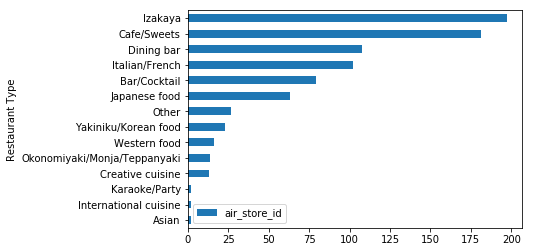

<Figure size 432x288 with 0 Axes>

In [8]:
stores_by_type = df.drop_duplicates(['air_genre_name','air_store_id'], keep='first')
stores_by_type = stores_by_type.groupby(by='air_genre_name').count()
stores_by_type = stores_by_type['air_store_id'].to_frame().sort_values(by = 'air_store_id', ascending=True)
stores_by_type = stores_by_type.rename({'air_store_id':'Count'})
stores_by_type.plot(kind='barh')
plt.ylabel('Restaurant Type')
plt.show()
plt.gcf().clear()

# What is the distribution of reservations?

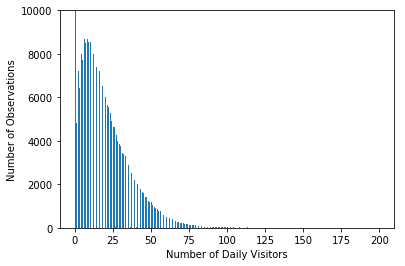

In [9]:
plt.hist(df.visitors_recode, bins = 400)
plt.ylim(df.visitors_recode.min(),10000)
plt.xlabel('Number of Daily Visitors')
plt.ylabel('Number of Observations')
plt.show()

In [10]:
median = df.visitors_recode.median()
print('Median Visitors:',median)
print(df.visitors_recode.describe())

Median Visitors: 14.0
count    296279.000000
mean         17.778167
std          16.607249
min           0.000000
25%           5.000000
50%          14.000000
75%          26.000000
max         199.855943
Name: visitors_recode, dtype: float64


# How many observations have zero visitors?

In [11]:
abnormal_freq = df.groupby('visitors_recode').count()
abnormal_freq = abnormal_freq.sort_values(by = 'air_store_id', ascending = False)
zeros = abnormal_freq.iloc[0,0]
pct_zeros = (zeros/len(df['visitors_recode']))*100
print('There are many observations with 0 visitors (', zeros,').  This is ', pct_zeros,'% of the sample.')

There are many observations with 0 visitors ( 44171 ).  This is  14.908582788520281 % of the sample.


# How do average reservations change over time?

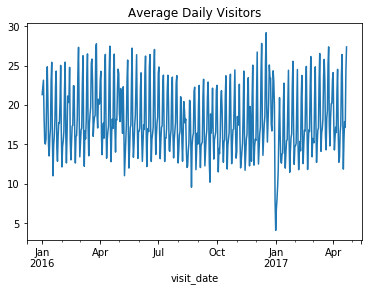

There does not appear to be an overall trend. However, there are clearly seasonal trends within each month.
There also appears to be some slight within-year trends. I will need to investigate the anomaly in January 2017 further.


In [12]:
df_dtix = df.set_index(pd.DatetimeIndex(df['visit_date']))
daily = df_dtix.resample('D').mean()
daily.visitors_recode.plot()
plt.title('Average Daily Visitors')
plt.show()
print('There does not appear to be an overall trend. However, there are clearly seasonal trends within each month.')  
print('There also appears to be some slight within-year trends. I will need to investigate the anomaly in January 2017 further.')


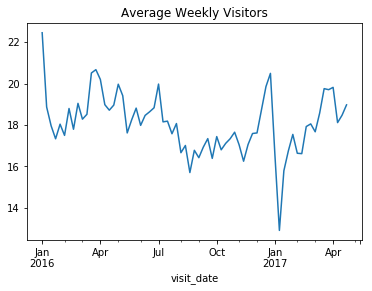

Looking at this trend by week provides a clearer picture of the seasonal variation.
It looks as if the number of visitors is highest April through July, December, and January.
The months betwen August through November seem to slow down for restaurants.


In [13]:
df_dtix = df.set_index(pd.DatetimeIndex(df['visit_date']))
weekly = df_dtix.resample('W').mean()
weekly.visitors_recode.plot()
plt.title('Average Weekly Visitors')
plt.show()
print('Looking at this trend by week provides a clearer picture of the seasonal variation.')
print('It looks as if the number of visitors is highest April through July, December, and January.')
print('The months betwen August through November seem to slow down for restaurants.')

# Does the number of visitors change by day of the week?

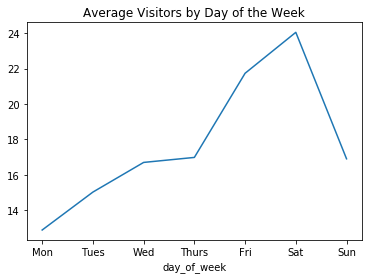

Monday is the slowest day of the week. The average number of visitors increases steadily throughout the week
and drops sharply on Sunday.


In [14]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
by_weekday = df.groupby(df.day_of_week).mean().reindex(ordered_days)
by_weekday.visitors_recode.plot()
plt.xticks(np.arange(7),('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.title('Average Visitors by Day of the Week')
plt.show()
print('Monday is the slowest day of the week. The average number of visitors increases steadily throughout the week')
print('and drops sharply on Sunday.')

# Which variables are significantly related to the number of visitors on a given day?

In [71]:
cont_vars = ['visitors_recode', 'avg_temperature', 'high_temperature', 'low_temperature', 
            'precipitation', 'hours_sunlight', 'day_of_month', 'rolling_mean', 'rolling_median',
            'rolling_std', 'rolling_mean_lag', 'rolling_median_lag', 'rolling_std_lag', 'visitors_lag', 'competition']
corr = pd.DataFrame(df[cont_vars].corr())
corr = corr['visitors_recode']
print(corr)


visitors_recode       1.000000
avg_temperature      -0.005168
high_temperature     -0.002688
low_temperature      -0.010364
precipitation        -0.040192
hours_sunlight        0.036339
day_of_month          0.028570
rolling_mean          0.648924
rolling_median        0.622436
rolling_std           0.508848
rolling_mean_lag      0.605290
rolling_median_lag    0.580626
rolling_std_lag       0.480565
visitors_lag          0.644737
competition          -0.025317
Name: visitors_recode, dtype: float64


In [19]:
#Calculate formal tests for each correlation

print('avg_temperature',sts.pearsonr(df['visitors_recode'], df['avg_temperature']))
print('high_temperature',sts.pearsonr(df['visitors_recode'], df['high_temperature']))
print('low_temperature',sts.pearsonr(df['visitors_recode'], df['low_temperature']))
print('precipitation',sts.pearsonr(df['visitors_recode'], df['precipitation']))
print('hours_sunlight',sts.pearsonr(df['visitors_recode'], df['hours_sunlight']))
print('day_of_month',sts.pearsonr(df['visitors_recode'], df['day_of_month']))
print('rolling_mean_lag',sts.pearsonr(df['visitors_recode'], df['rolling_mean_lag']))
print('rolling_median_lag',sts.pearsonr(df['visitors_recode'], df['rolling_median_lag']))
print('rolling_std_lag',sts.pearsonr(df['visitors_recode'], df['rolling_std_lag']))
print('visitors_lag',sts.pearsonr(df['visitors_recode'], df['visitors_lag']))
print('competition',sts.pearsonr(df['visitors_recode'], df['competition']))

avg_temperature (-0.005168114190075428, 0.0049067938551924815)
high_temperature (-0.002687746016948705, 0.14347356606366088)
low_temperature (-0.010364451499255323, 1.6842248830092913e-08)
precipitation (-0.04019170624742732, 3.5546784750381065e-106)
hours_sunlight (0.0363387296733106, 3.9168027017470284e-87)
day_of_month (0.028570339085871522, 1.4859147674822658e-54)
rolling_mean_lag (0.605289533046973, 0.0)
rolling_median_lag (0.5806263151388045, 0.0)
rolling_std_lag (0.48056497323447456, 0.0)
visitors_lag (0.6447368199601873, 0.0)
competition (-0.025317393959594446, 3.2351249631532106e-43)
